# Projet n°1 Math F314: Pendule Double 

#### HOUYOUX Guillaume, BROISSIN Jérémy


Dans ce premier projet, nous allons étudier un problème bien connu de la physique moderne: *le pendule double*. Dans un premier lieu nous allons nous intéresser à sa résolution de manière quadratique à quadrature près puis nous allons résoudre le problème de manière numérique grâce à la fonction Rk4, que nous expliciterons aussi de manière théorique afin de mieux comprendre la résolution numérique au problème.

## *I.Introduction*

Le double pendule est un pendule simple lui-même accroché à l'extrémité d'un autre pendule, il fait partie des systèmes dits chaotiques, cest-à-dire des systèmes très sensibles aux conditions initiales. Les systèmes sont tellement sensibles aux conditions initiales, qu'une toute petite variation entraîne un résultat complètement différent et rend donc en général impossible la prédiction des résultats à long terme.

Contrairement au pendule simple, il nexiste pas de solution analytique à ses équations du mouvement. Il faut donc effectuer des simulations numériques pour les résoudre, ce que nous ferons ici.

## *II.Pendule Double: Résolution quadratique*


<img src="pendule_double.png" alt="Schéma Pendule Double" width="250" height="250">
*Figure 1: Schéma du Pendule double*

On supposera dans notre problème que les deux tiges de notre sont de même longueur $l$ et également de même masse $m$.
On fera aussi l'hypothèse que la masse des tiges est répartie uniformément, ce qui permettra de travailler avec les positions respectives des centres de masse des deux tiges.

$$x_1= \frac{l}{2}sin(\theta_1)$$
$$y_1= \frac{-l}{2}cos(\theta_1)$$
$$x_2= l[sin(\theta_1)+ \frac{1}{2}sin(\theta_2)]$$
$$y_2= -l[cos(\theta_1)+ \frac{1}{2}cos(\theta_2)]$$

Les variables angulaires dépendent du temps, il est donc intéressant de dériver les équations de position.

$$\dot{x_1}= \frac{l}{2}\dot{\theta_1}cos(\theta_1)$$
$$\dot{y_1}= \frac{l}{2}\dot{\theta_1}sin(\theta_1)$$
$$\dot{x_2}= l[\dot{\theta_1}cos(\theta_1) + \frac{1}{2}\dot{\theta_2}cos(\theta_2)]$$
$$\dot{y_2}= l[\dot{\theta_1}sin(\theta_1) + \frac{1}{2}\dot{\theta_2}sin(\theta_2)]$$

Ceci nous permet à présent de formuler l' énergie cinétique $T$ et potentielle $V$ de notre système.  

Avec ces informations, on peut calculer $T$: 

$$T= \frac{1}{2}m(\dot{x_1}^2 + \dot{x_2}^2 + \dot{y_1}^2 + \dot{y_2}^2) + \frac{1}{2}I(\dot{\theta_1}^2 + \dot{\theta_2}^2)$$
$$T= \frac{1}{2}m \bigg[\frac{l^2}{4}\dot{\theta_1}^2 + l^2\bigg(\dot{\theta_1}^2cos^2(\theta_1) +\dot{\theta_1}\dot{\theta_2}cos(\theta_1)cos(\theta_2) + \frac{1}{4}\dot{\theta_2}^2cos^2(\theta_2)\bigg) + l^2\bigg(\dot{\theta_1}^2sin^2(\theta_1) +\dot{\theta_1}\dot{\theta_2}sin(\theta_1)sin(\theta_2) + \frac{1}{4}\dot{\theta_2}^2sin^2(\theta_2)\bigg)\bigg] + \frac{1}{2}I(\dot{\theta_1}^2 + \dot{\theta_2}^2) $$
Après simplification:
$$T(\dot{\theta_1},\dot{\theta_2})= \frac{2}{3}ml^2\dot{\theta_1}^2 + \frac{1}{2}ml^2\dot{\theta_1}\dot{\theta_2}cos(\theta_1 - \theta_2) + \frac{1}{6}ml^2\dot{\theta_2}^2$$
 
$$V= mg(y_1+y_2)$$
$$V(\theta_1,\theta_2) = -\frac{l}{2}mg \big(3cos(\theta_1) + cos(\theta_2) \big)$$

On exprime enfin le lagrangien $\mathcal{L}=T-V$:

$$\mathcal{L}(\theta_1,\dot{\theta_1},\theta_2,\dot{\theta_2})= \frac{l^2}{6}m \bigg[4\dot{\theta_1}^2 + \dot{\theta_2}^2 + 3\dot{\theta_1}\dot{\theta_2}cos(\theta_1 -\theta_2)\bigg] + \frac{l}{2}mg\bigg(3cos(\theta_1)+cos(\theta_2)\bigg)$$

On en déduit alors les équations *Euler-Lagrange* que nous utiliserons pour résoudre notre problème.

$$\frac{\partial\mathcal{L}}{\partial\dot{\theta_1}}= p_{\theta_1}= \frac{ml^2}{6}\bigg[8\dot{\theta_1}+3\dot{\theta_2}cos(\theta_1-\theta_2)\bigg] (1)$$
$$\frac{\partial\mathcal{L}}{\partial\dot{\theta_2}}= p_{\theta_2}= \frac{ml^2}{6}\bigg[2\dot{\theta_2}+3\dot{\theta_1}cos(\theta_1-\theta_2)\bigg] (2)$$
$$\frac{\partial\mathcal{L}}{\partial\theta_1}=\dot{p_{\theta_1}}= \frac{-ml^2}{2}\bigg[\dot{\theta_1}\dot{\theta_2}sin(\theta_1 -\theta_2) + \frac{3g}{l}sin(\theta_1)\bigg] (3)$$
$$\frac{\partial\mathcal{L}}{\partial\theta_2}=\dot{p_{\theta_2}}= \frac{-ml^2}{2}\bigg[-\dot{\theta_1}\dot{\theta_2}sin(\theta_1 -\theta_2) + \frac{g}{l}sin(\theta_2)\bigg](4)$$

En injectant (1) dans (2), on obtient:

$$\dot{\theta_1} = \frac{6}{ml^2} \frac{2p_{\theta_1}-3cos(\theta_1 -\theta_2)p_{\theta_2}}{16-9cos^2(\theta_1 -\theta_2)} (5)$$
$$ \dot{\theta_2} = \frac{6}{ml^2} \frac{8p_{\theta_2}-3cos(\theta_1 -\theta_2)p_{\theta_1}}{16-9cos^2(\theta_1 -\theta_2)} (6)$$

Les équations (3),(4),(5) et (6) sont les équations du mouvement de notre système.

## *III.Pendule double: résolution numérique*

Nous allons maintenant utiliser la méthode de Runge-kutta d'ordre 4 (Rk4) pour résoudre nos équations du mouvement numériquement. 
Tout d'abord nous implémentons les bibliothèques de Python qui nous seront utiles.


In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib inline
from IPython.display import HTML

Rk4 est une méthode d'analyse numérique permettant d'approximer les solutions d'équations différentielles. Elle consiste en une itération en partant d'une condition initiale.

In [2]:
def rk4(f,f_0,h,ini,fin):
    """Fonction qui prend comme paramètres la fonction f que nous définissons plus bas,
       un quadri-vecteur contenant les conditions initiales, un pas (sur lequel on va itérer)
       et les limites de notre intervalle de temps. La fonction renvoie une matrice Nx4
       contenant les valeurs des équations du mouvement pour chaque de l'intervalle"""
    N = math.ceil((fin-ini)/h) 
    y = np.zeros((N,4))
    y[0] = f_0 #Conditions initiales
    
    for n in range(N-1): #On implémente les itérations de la méthode
        k1 = h * f(y[n])
        k2 = h * f(y[n] + k1/2)
        k3 = h * f(y[n] + k2/2)
        k4 = h * f(y[n] + k3)
        y[n+1] = y[n] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return y

In [3]:
#Constantes fixées du problème
m = 1
l = 1
g = 9.81

In [9]:
def f(y):
    """Fonction qui prend une liste de 4 éléments et qui renvoie une autre 
        liste de 4 éléments contenant les valeurs des équations du mouvement"""
    th1 = y[0] 
    th2 = y[1]
    p1 = y[2]
    p2 = y[3]

    #définition des équations du mouvement 
    f1 = 6/(m*l**2) * (2*p1 -3*np.cos(th1-th2)*p2)/(16-9*np.cos(th1-th2)**2) 
    f2 = 6/(m*l**2) * (8*p2 -3*np.cos(th1-th2)*p1)/(16-9*np.cos(th1-th2)**2)
    f3 = -(m*l**2)/2 * (f1*f2*np.sin(th1-th2) + 3*(g/l)*np.sin(th1))
    f4 = -(m*l**2)/2 * (-f1*f2*np.sin(th1-th2) + 3*(g/l)*np.sin(th2))

    #création d'une liste qui contient les équations
    table = np.ones(4)
    table[0] = f1
    table[1] = f2
    table[2] = f3
    table[3] = f4

    return table #sera le premier parmètre de rk4

In [10]:
#On impose nos conditions initiales
table = np.ones(4) 
table[0] = np.pi/2
table[1] = np.pi/2
table[2] = 0.0
table[3] = 0.0

In [11]:
print(rk4(f,table, 0.001, 0.0, 20.0))

[[ 1.57079633  1.57079633  0.          0.        ]
 [ 1.57080263  1.57076479 -0.014715   -0.014715  ]
 [ 1.57082155  1.5706702  -0.02943    -0.02943   ]
 ..., 
 [ 1.60129597  0.12621619 -1.71281613 -3.00326914]
 [ 1.60030906  0.11734579 -1.73188324 -3.00069798]
 [ 1.59928168  0.10847706 -1.75113182 -2.99781617]]


**Question 1: Que valent les positions des extrémités des barreaux après *20sec* ? **

In [20]:
     """Ici la réponse sera formulé sous forme de liste telle qu'on aura [x1 y1 x2 y2]"""
liste = np.ones(4) 
liste[0] = np.sin(1.59821381)
liste[1] = -np.cos(1.59821381)
liste[2] = np.sin(1.59821381) + 2*np.sin(0.09961004)
liste[3] = -np.cos(1.59821381) - 2*np.cos(0.09961004)

print ("Extrémité du barreau 1:","(",liste[0],",",liste[1],")")
print ("Extrémité du barreau 2:","(",liste[2],",",liste[3],")")

Extrémité du barreau 1: ( 0.999624164352 , 0.0274140482965 )
Extrémité du barreau 2: ( 1.19851495883 , -1.96267199303 )


In [21]:
#On utilise la fonction du MOOC
def l1_diff(u_coarse,u_fine,dt):
    N_coarse =len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * np.sum(np.abs(u_coarse-u_fine[::ratio]))
    return diff

Tout ceci reste une approximation des solutions, il est donc intéressant de s'intéresser à l'ordre de convergence de notre méthode. C'est-à-dire à la 'vitesse' à laquelle les termes convergent vers leur limite.

**Question 2: Quel est l'ordre de la méthode utilisée ?**

In [17]:
T = 20.0 #Temps final
r = 7.0 #Coefficient de proportionnalité des intervalles de temps
dt_values = [0.001,0.001/r,0.001/r**2]
u_values = [] #On implémente 2 listes vides
diff_values = []
for i in range (len(dt_values)):
    u_values.append(rk4(f,table, dt_values[i], 0.0, 20.0)) #On intégre les résultats de Rk4 dans la première liste
for i in range (len(u_values)-1):
    diff= l1_diff(u_values[i],u_values[-1],dt_values[i]) #On calcule le quotient avec la fonction ci-dessus 
    diff_values.append(diff) #On rempli notre liste avec les résultats de l1_diff

#On calcule l'ordre p de convergence grâce à la définition donnée dans le MOOC
p = -int(math.log(l1_diff(u_values[1], u_values[2], dt_values[2]) / l1_diff(u_values[0], u_values[1], dt_values[1])) / math.log(r))
print('Ordre de convergence observé: p = {:.3f}'.format(p))

Ordre de convergence observé: p = 4.000


Malgré de multiples tentatives pour trouver une taille correcte pour les intervalles, l'ordre donné ne se rapprochait pas suffisamment de 4 (qui est l'ordre théorique de la méthode). Il a donc été convenu de prendre l'entier le proche et de prendre une valeur absolue pour anticiper un ordre négatif provenant des ratios des intervalles. 

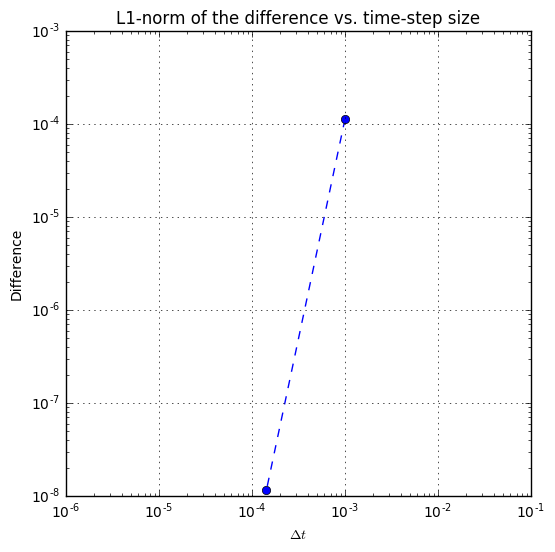

In [6]:
# Plot difference versus the time-step size.
# On récupère la fonction depuis le MOOC directement
plt.figure(figsize=(6.0, 6.0))
plt.title('L1-norm of the difference vs. time-step size')
plt.xlabel('$\Delta t$')
plt.ylabel('Difference')
plt.grid()
plt.loglog(dt_values[:-1], diff_values,
              color='blue', linestyle='--', marker='o')
plt.axis('equal');

Nous pouvons donc voir graphiquement que l'ordre de convergence est proche de 4 grâce à l'allure de la pente.
Finissons cet exposé en faisant une animation de ce pendule double répondant à nos conditions initiales.

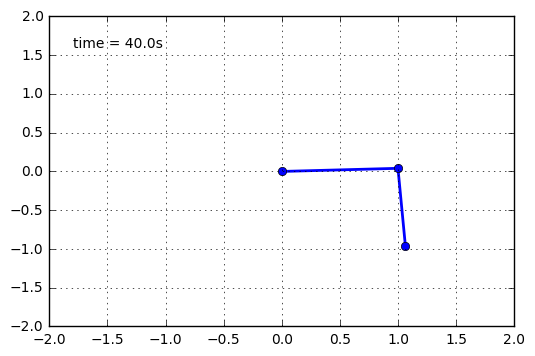

In [18]:
y=rk4(f,table,0.005,0.0,20.0)

#On intègre nos solutions trouvées grâce à rk4 dans nos équations du mouvement en coordonnées cartésiennes
x1 = np.sin(y[:,0])
y1 = -np.cos(y[:,0])

x2 = np.sin(y[:,1]) + x1
y2 = -np.cos(y[:,1]) + y1

#On utilise la librairie de pyplot pour initialiser notre repère
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

#On définit une fonction pour exprimer le temps de notre animation
def initiate():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

#On définit une fonction qui indique graphiquement nos barres ainsi que leur mouvement dans le temps
def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*0.01))
    return line, time_text

#On réutilise la fonction du MOOC pour lancer l'animation
anim = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=initiate)

#La vidéo fonctionne grâce à l'ajout de FFMPEG
HTML(anim.to_html5_video())

Ici notre vidéo répète quelques fois le mouvement durant ses 20 premières secondes. Notre animation ne montre pas alors ce qu'il se passe à partir de 21 secondes, à ne pas confondre donc avec les secondes marquées sur la grille. 

## Références

Image et équations du mouvement: https://en.wikipedia.org/wiki/Double_pendulum

Aide à la programmation: 
https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6286+2017/courseware/2fdaf0aca1ed4e30b1ec5b9b1a1fc997/5798d5b734ca4aca9e1e5f61554d8541/ (Module 2) 
&
https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6286+2017/courseware/2fdaf0aca1ed4e30b1ec5b9b1a1fc997/5798d5b734ca4aca9e1e5f61554d8541/ (Module 1)
